## 2021 Visualizations

This notebook produces visualizations for the ACS standard dataframes for cities of interest. 

### Read in Data

In [1]:
# import required libraries
import os
import sys
### add system path to get other library directories
sys.path[0] = os.path.join(os.path.abspath(''),'..')

import geopandas
import warnings
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import glob
import data_pipeline.spatial_operations as so
warnings.filterwarnings('ignore')

In [2]:
## if file doesn't exist then unzip
if os.path.exists("/tmp/data/standard_acs_censustract_df_2021.geojson"):
    ACS_2021_MERGED_FILE = "/tmp/data/standard_acs_censustract_df_2021.geojson"
else:
    with zipfile.ZipFile('/tmp/data/standard_acs_censustract_df_2021.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/data/')
    ACS_2017_MERGED_FILE = "/tmp/data/standard_acs_censustract_df_2021.geojson"
    
if os.path.exists("/tmp/data/standard_acs_censustract_df_2017.geojson"):
    ACS_2017_MERGED_FILE = "/tmp/data/standard_acs_censustract_df_2017.geojson"
else:
    with zipfile.ZipFile('/tmp/data/standard_acs_censustract_df_2017.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/data/')
    ACS_2017_MERGED_FILE = "/tmp/data/standard_acs_censustract_df_2017.geojson"

In [3]:
# read in the files
acs_2017_standard_df = geopandas.read_file(ACS_2017_MERGED_FILE)
acs_2021_standard_df = geopandas.read_file(ACS_2021_MERGED_FILE)

### Check dimensions to see how many columns are in each dataframe

In [4]:
acs_2017_standard_df.shape

(9214, 272)

In [5]:
acs_2021_standard_df.shape

(10213, 274)

### Maps by City for 2017: "Total: No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"

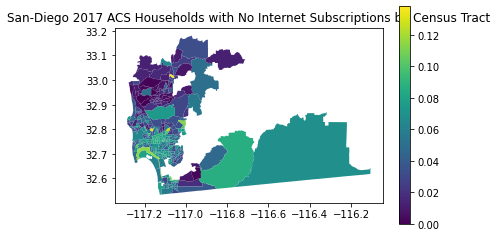

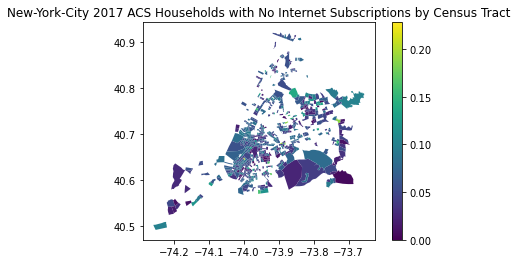

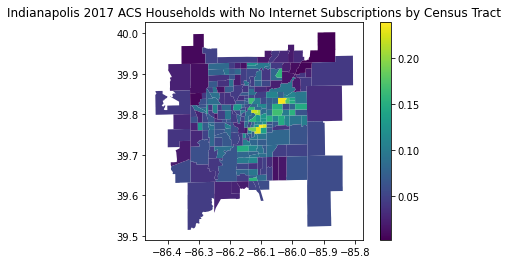

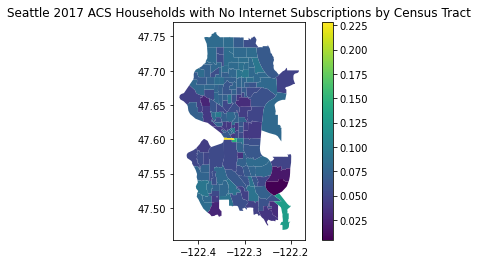

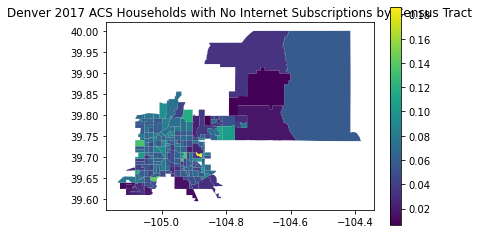

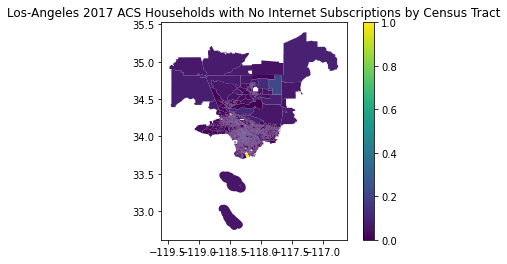

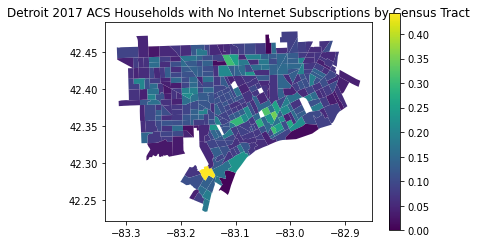

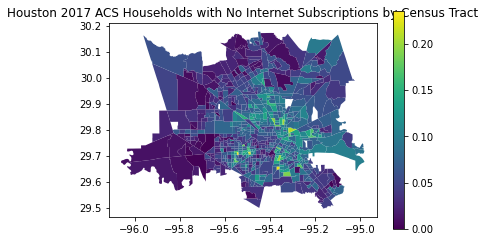

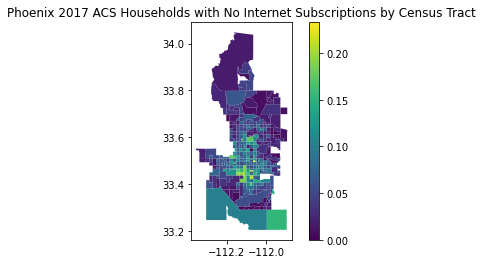

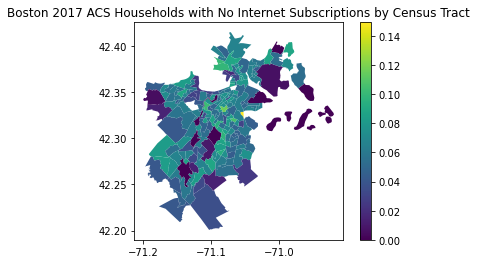

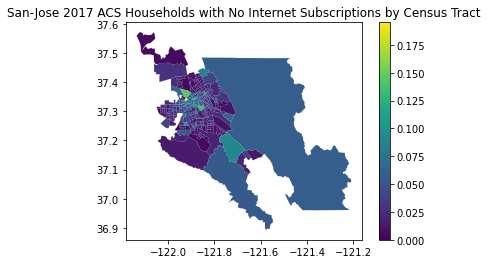

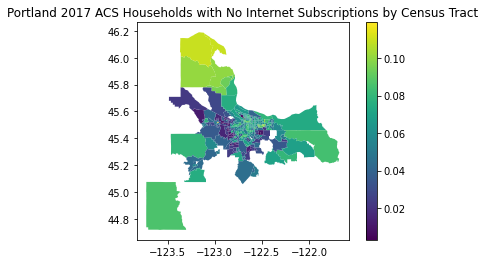

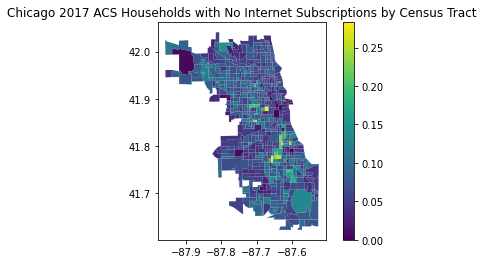

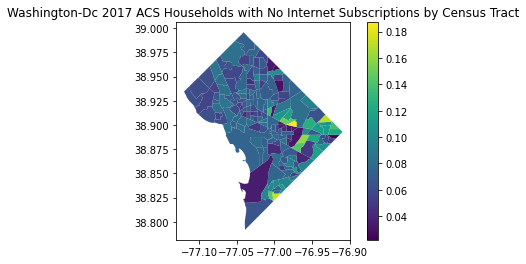

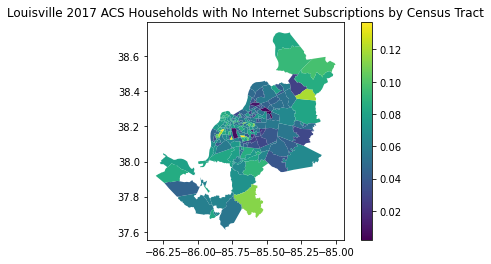

In [11]:
for city in set(acs_2017_standard_df['City']):
    city_df = acs_2017_standard_df[acs_2017_standard_df['City'] == city]
    so.simple_map(city_df.drop_duplicates(subset='tract'), 'PERC Estimate!!Total:!!No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD', 
                  'tract', f'{city.title()} 2017 ACS Households with No Internet Subscriptions by Census Tract', f"/tmp/visualizations/{city}-acs-no-internet-tract-2017.png")

### Maps by City for 2021: "Total: No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"

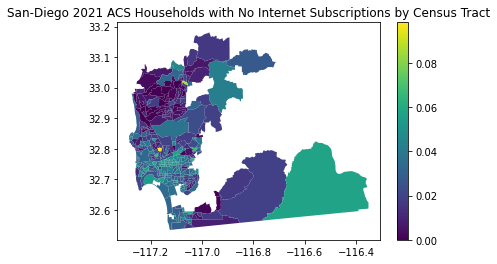

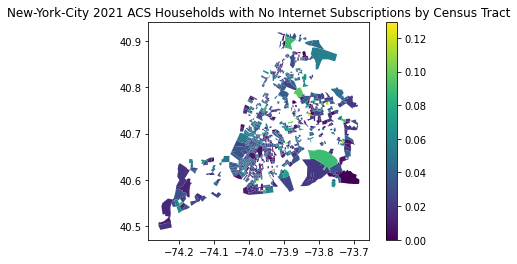

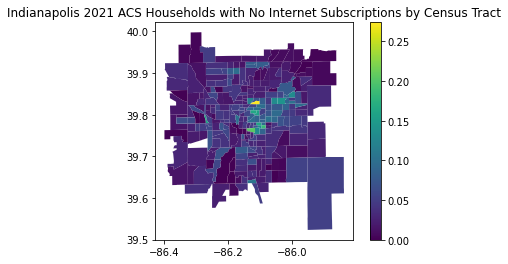

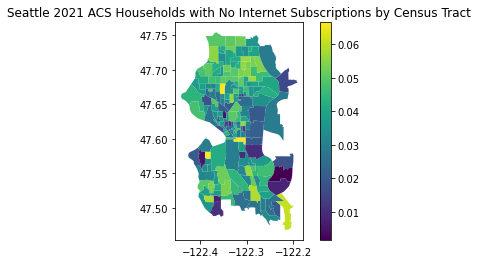

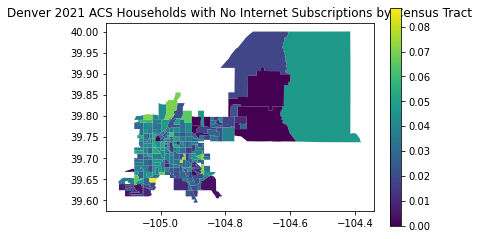

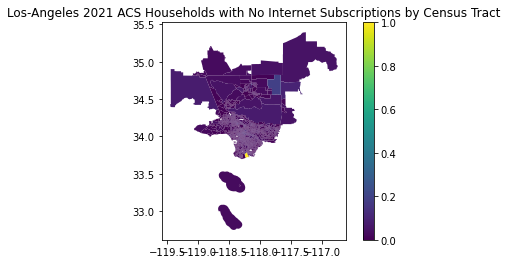

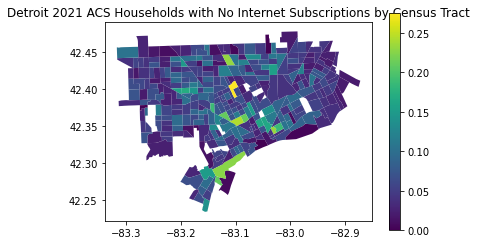

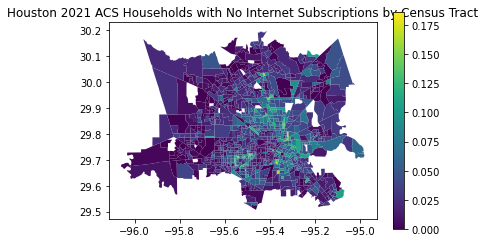

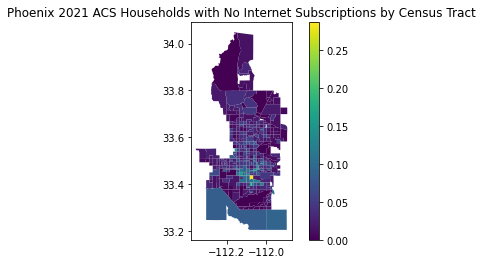

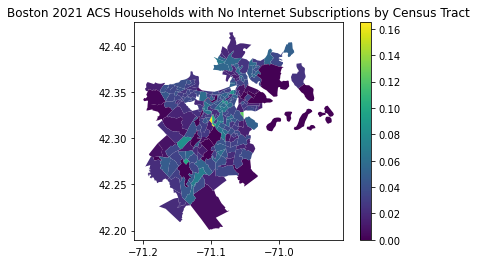

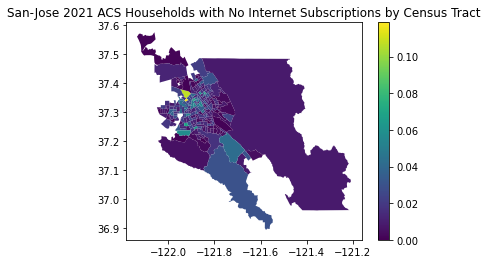

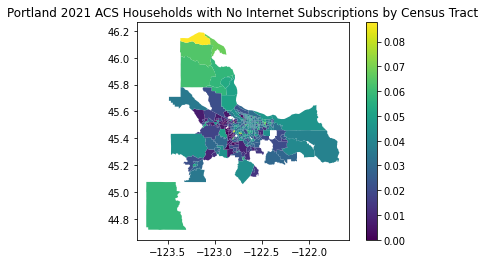

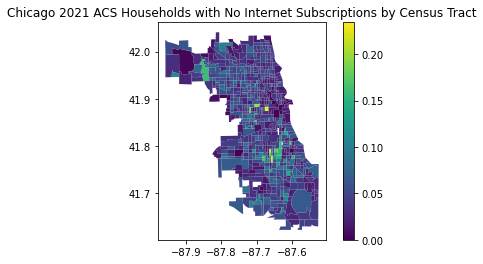

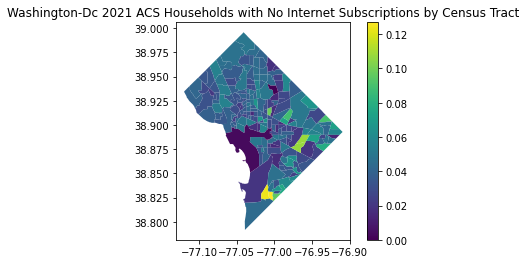

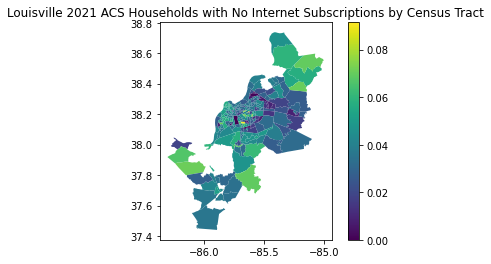

In [12]:
for city in set(acs_2021_standard_df['City']):
    city_df = acs_2021_standard_df[acs_2021_standard_df['City'] == city]
    so.simple_map(city_df.drop_duplicates(subset='tract'), 'PERC Estimate!!Total:!!No Internet access: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD', 
                  'tract', f'{city.title()} 2021 ACS Households with No Internet Subscriptions by Census Tract', f"/tmp/visualizations/{city}-acs-no-internet-tract-2021.png")